In [1]:
include("../src/iTEBD.jl")
using Main.iTEBD, EDKit, LinearAlgebra, Test

## AKLT Ground State

In [2]:
G = begin
    dt = 0.1
    ss = spin((1,"xx"), (1,"yy"), (1,"zz"), D=3)
    H = ss + 1/3*ss^2 |> Array
    iTEBD.convert_operator(exp(- dt * H), 3, 2);
end

# Exact AKLT ground state
aklt = begin
    aklt_tensor = zeros(2,3,2)
    aklt_tensor[1,1,2] = +sqrt(2/3)
    aklt_tensor[1,2,1] = -sqrt(1/3)
    aklt_tensor[2,2,2] = +sqrt(1/3)
    aklt_tensor[2,3,1] = -sqrt(2/3)
    aklt_tensor
    iMPS([aklt_tensor, aklt_tensor])
end

BOND = 4
ψ = rand_iMPS(ComplexF64, 2, 3, BOND)

for i=1:1000
    applygate!(ψ, G, 1, 2, renormalize=true,cutoff=1e-5)
    applygate!(ψ, G, 2, 1, renormalize=true,cutoff=1e-5)
end

@test inner_product(aklt, ψ) ≈ 1.0

Test Passed

## PXP

In [8]:
using DelimitedFiles, Printf
data = readdlm("Ent_Z2.dat")
t = data[:,1]
s = data[:,2]

z2 = begin
    v = [[0, 1], [1,0], [0, 1], [1,0]]
    product_iMPS(ComplexF64, v)
end

P = [0 0; 0 1]
X = [0 1; 1 0]
PXP = kron(P,X,P)
dt = 0.02
G = exp(-1im*dt*PXP)

S = zeros(350)

for i=2:350
    for j=1:5
        applygate!(z2, G,1,3,maxdim=128)
        applygate!(z2, G,2,4,maxdim=128)
        applygate!(z2, G,3,1,maxdim=128)
        applygate!(z2, G,4,2,maxdim=128)
    end
    EE = iTEBD.ent_S(z2, 1)
    if mod(i, 5) == 0
        @printf("t = %.1f, S = %.5f.\n", 0.1*i, EE)
    end
    S[i] = EE
end

t = 0.4, S = 0.00365.
t = 0.9, S = 0.08791.
t = 1.4, S = 0.12470.
t = 1.9, S = 0.08293.
t = 2.4, S = 0.10552.
t = 2.9, S = 0.12002.
t = 3.4, S = 0.21121.
t = 3.9, S = 0.23240.
t = 4.4, S = 0.23530.
t = 4.9, S = 0.25190.
t = 5.4, S = 0.28222.
t = 5.9, S = 0.36531.
t = 6.4, S = 0.35665.
t = 6.9, S = 0.36781.
t = 7.4, S = 0.38144.
t = 7.9, S = 0.42826.
t = 8.4, S = 0.48978.
t = 8.9, S = 0.49077.
t = 9.4, S = 0.51386.
t = 9.9, S = 0.53025.
t = 10.4, S = 0.59465.
t = 10.9, S = 0.63361.
t = 11.4, S = 0.63785.
t = 11.9, S = 0.65886.
t = 12.4, S = 0.68152.
t = 12.9, S = 0.74418.
t = 13.4, S = 0.76305.
t = 13.9, S = 0.77908.
t = 14.4, S = 0.79928.
t = 14.9, S = 0.83834.
t = 15.4, S = 0.89746.
t = 15.9, S = 0.90350.
t = 16.4, S = 0.92460.
t = 16.9, S = 0.94431.
t = 17.4, S = 0.98954.
t = 17.9, S = 1.03185.
t = 18.4, S = 1.04316.
t = 18.9, S = 1.06690.
t = 19.4, S = 1.09140.
t = 19.9, S = 1.14820.
t = 20.4, S = 1.17554.
t = 20.9, S = 1.18783.
t = 21.4, S = 1.21019.
t = 21.9, S = 1.23905.
t = 22.4

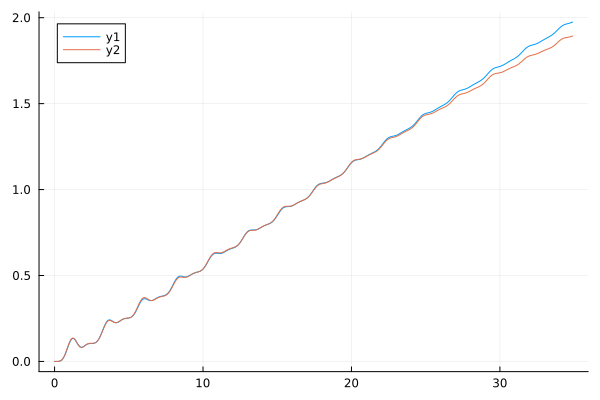

In [9]:
using Plots
plot(t, [s, S])